In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading Data
df = pd.read_csv('Headbrain.csv')
print(df.shape)
df.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [9]:
df.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [10]:
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values

In [11]:
X

array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982, 3443,
       3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424, 3878, 4046,
       3804, 3710, 4747, 4423, 4036, 4022, 3454, 4175, 3787, 3796, 4103,
       4161, 4158, 3814, 3527, 3748, 3334, 3492, 3962, 3505, 4315, 3804,
       3863, 4034, 4308, 3165, 3641, 3644, 3891, 3793, 4270, 4063, 4012,
       3458, 3890, 4166, 3935, 3669, 3866, 3393, 4442, 4253, 3727, 3329,
       3415, 3372, 4430, 4381, 4008, 3858, 4121, 4057, 3824, 3394, 3558,
       3362, 3930, 3835, 3830, 3856, 3249, 3577, 3933, 3850, 3309, 3406,
       3506, 3907, 4160, 3318, 3662, 3899, 3700, 3779, 3473, 3490, 3654,
       3478, 3495, 3834, 3876, 3661, 3618, 3648, 4032, 3399, 3916, 4430,
       3695, 3524, 3571, 3594, 3383, 3499, 3589, 3900, 4114, 3937, 3399,
       4200, 4488, 3614, 4051, 3782, 3391, 3124, 4053, 3582, 3666, 3532,
       4046, 3667, 2857, 3436, 3791, 3302, 3104, 3171, 3572, 3530, 3175,
       3438, 3903, 3899, 3401, 3267, 3451, 3090, 34

In [12]:
Y

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375, 1340,
       1380, 1355, 1522, 1208, 1405, 1358, 1292, 1340, 1400, 1357, 1287,
       1275, 1270, 1635, 1505, 1490, 1485, 1310, 1420, 1318, 1432, 1364,
       1405, 1432, 1207, 1375, 1350, 1236, 1250, 1350, 1320, 1525, 1570,
       1340, 1422, 1506, 1215, 1311, 1300, 1224, 1350, 1335, 1390, 1400,
       1225, 1310, 1560, 1330, 1222, 1415, 1175, 1330, 1485, 1470, 1135,
       1310, 1154, 1510, 1415, 1468, 1390, 1380, 1432, 1240, 1195, 1225,
       1188, 1252, 1315, 1245, 1430, 1279, 1245, 1309, 1412, 1120, 1220,
       1280, 1440, 1370, 1192, 1230, 1346, 1290, 1165, 1240, 1132, 1242,
       1270, 1218, 1430, 1588, 1320, 1290, 1260, 1425, 1226, 1360, 1620,
       1310, 1250, 1295, 1290, 1290, 1275, 1250, 1270, 1362, 1300, 1173,
       1256, 1440, 1180, 1306, 1350, 1125, 1165, 1312, 1300, 1270, 1335,
       1450, 1310, 1027, 1235, 1260, 1165, 1080, 1127, 1270, 1252, 1200,
       1290, 1334, 1380, 1140, 1243, 1340, 1168, 13

In [13]:
# Means of x and y
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [14]:
mean_x

np.float64(3633.9915611814345)

In [15]:
mean_y

np.float64(1282.873417721519)

In [16]:
# Total number of values

n = len(X)

In [17]:
n

237

In [18]:
# Using the formular to calculate b1 and b2
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - mean_x) * (Y[i] - mean_y)
    denominator += (X[i] - mean_x)**2

b1 = numerator/denominator
b0 = mean_y - (b1 * mean_x)

#print coefficients
print(b0,b1)

325.57342104944223 0.26342933948939945


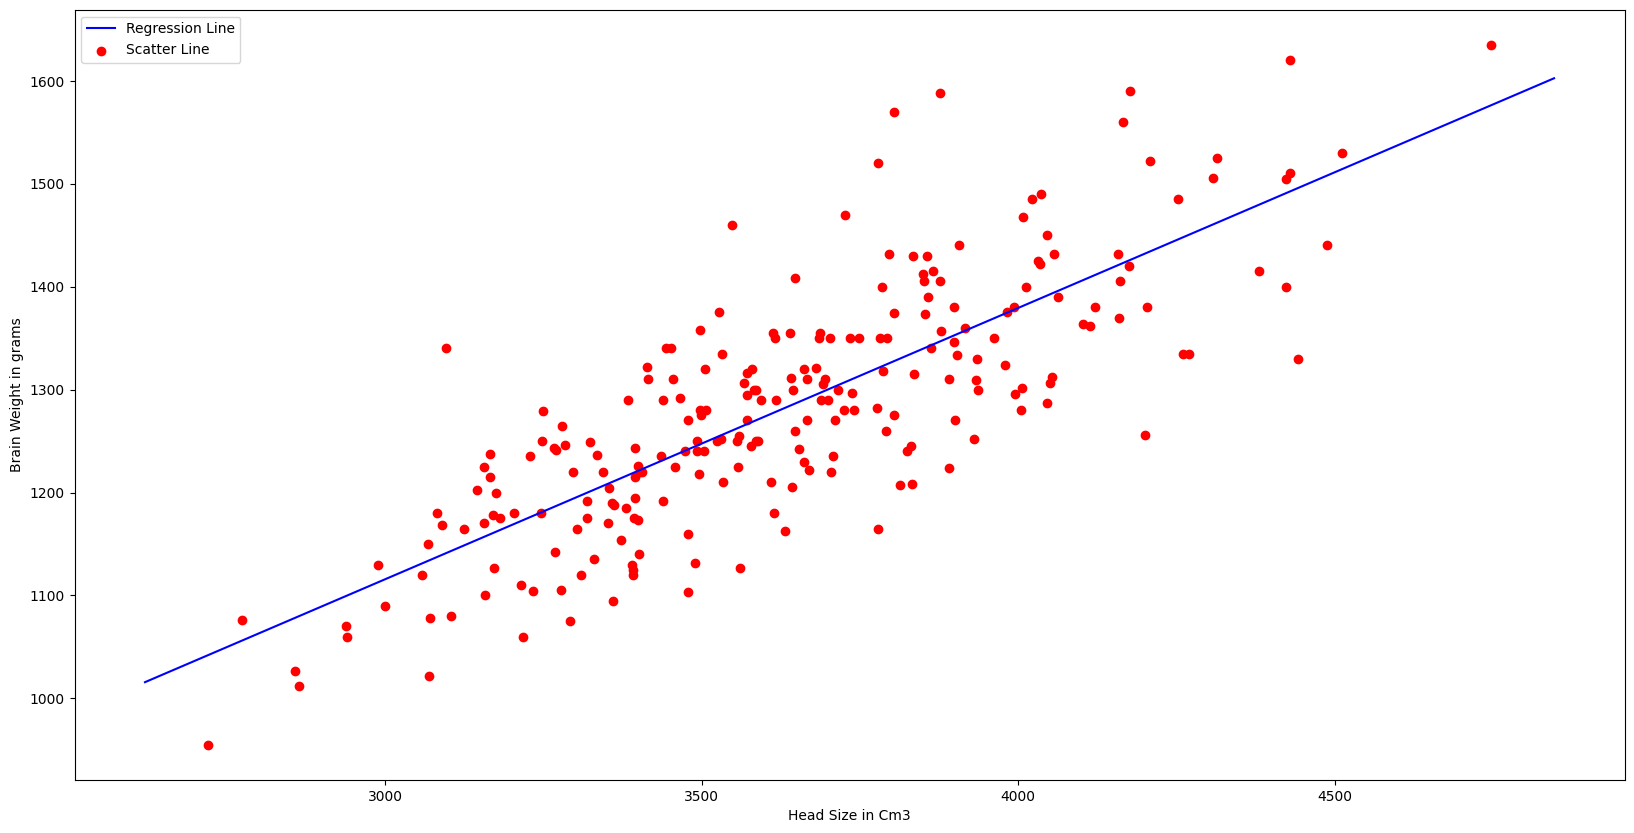

In [19]:
# Plotting values and regression license
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculation line values x and y

x = np.linspace(min_x,max_x,1000)
y = b0 + b1*x

# Plotting line

plt.plot(x,y,color = 'blue',label = 'Regression Line')

# Plotting scatter points
plt.scatter(X,Y, c = 'red',label = 'Scatter Line')

plt.xlabel('Head Size in Cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [20]:
ss_t = 0
ss_r = 0

for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y)**2
    ss_r += (Y[i] - y_pred)**2

r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = X.reshape(n,1)

#Creating model

reg = LinearRegression()
#Fitting Training Data
reg = reg.fit(X,Y)
#Prediction

Y_pred = reg.predict(X)

#Calculating RMSE and R2 score
mse = mean_squared_error(Y,Y_pred)
rms = np.sqrt(mse)
r2_score = reg.score(X,Y)

print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957
